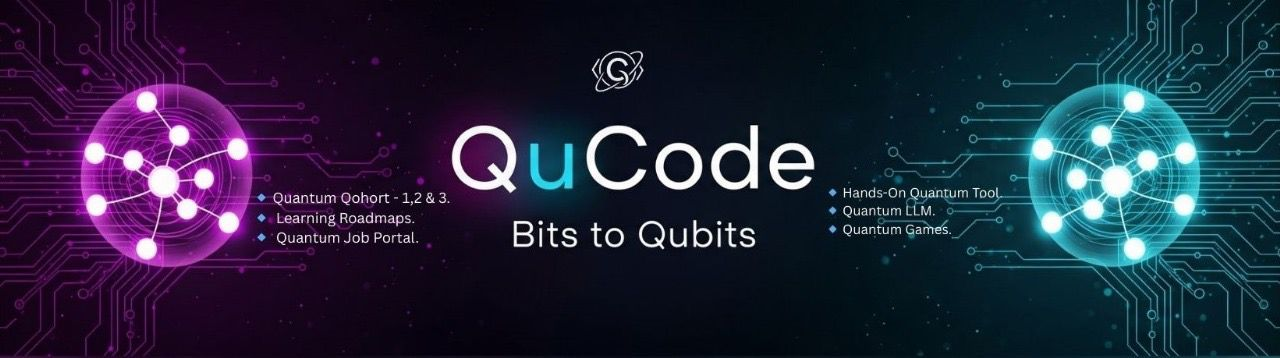


# QuCode 21 Days Challenge

## Hands on Exercise

Hello, Hola, ನಮಸ್ಕಾರ, నమస్తే, નમસ્તે, नमस्ते, ਸਤ ਸ੍ਰੀ ਅਕਾਲ, নমস্কার...

The task, should you choose to accept it, is to **implement Shor's algorithm in Qiskit**.  

Relax—not the entire implementation! Your goal is to **finish the unfinished parts** of the provided code.

Here’s an example to get you started: creating an **n-qubit GHZ state**. In the example, you will see `# TODO` markers—this is where you write your code. Check the provided solution to see how it can be done.  

Once you’re comfortable with this smaller task, you can approach the **Shor’s algorithm implementation**.

If you ever get stuck or face any issues, feel free to drop a message on our [Discord](https://discord.gg/MNhGhZg83E) Server.  

For any other suggestions, feedback, or questions, please reach out to us at **team@qucode.in**.

**All the best—have fun experimenting with quantum circuits!**

## Qiskit Version

Make sure you have Installed <code>Qiskit</code> and <code>Qiskit-Aer</code>

Version of <code>Qiskit</code> used in this Notebook is `2.1.1` and Version of <code>Qiskit-Aer</code> is `0.17.1`

Run the following cell to check version. As long as version of <code>Qiskit</code> is `>=2.0.0` and Version of <code>Qiskit-Aer</code> is `>=0.17.0`, it should work fine

In [4]:
import qiskit

qiskit.version.get_version_info()

'2.1.2'

In [9]:
import qiskit_aer

qiskit_aer.version.get_version_info()

'0.17.1'

### Task Example

Create n-qubit GHZ State

In [17]:
# ghz_state_task.py
"""
Task: Complete the TODOs to create and simulate a GHZ state circuit.
You may choose 3 or 4 qubits depending on the problem statement.
"""

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer


def build_ghz_circuit(num_qubits):
    """
    Build a GHZ state circuit with `num_qubits`.
    GHZ state = (|000...0> + |111...1>) / sqrt(2)
    """
    qc = QuantumCircuit(num_qubits, num_qubits)

    # TODO 1: Apply a Hadamard gate on the first qubit

    qc.h(0)

    # TODO 2: Apply a chain of CNOT gates from the first qubit
    #         to all other qubits to entangle them

    for i in range(1, num_qubits):
        qc.cx(0, i)

    # TODO 3: Measure all qubits into classical bits

    qc.measure(range(num_qubits), range(num_qubits))

    return qc


def simulate_circuit(qc, shots=1024):
    """Simulate the given circuit and return measurement counts."""
    sim = Aer.get_backend("qasm_simulator")

    # TODO 4: Transpile the circuit for the simulator
    # transpiled = ?
    # result = ?
    transpiled = transpile(qc, backend=sim)
    result = sim.run(transpiled, shots=shots).result()

    # TODO 5: Extract and return measurement counts
    # counts = ?
    counts = result.get_counts()
    return counts


num_qubits = 3  # change to 4 for a 4-qubit GHZ state
qc = build_ghz_circuit(num_qubits)
print("Generated GHZ circuit:")
print(qc.draw())

counts = simulate_circuit(qc, shots=1024)
print("Measurement counts:", counts)
   

Generated GHZ circuit:
     ┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2 
Measurement counts: {'000': 508, '111': 516}


### Solution Example

In [16]:
# ghz_state_solution.py

from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer

def build_ghz_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard on first qubit
    qc.h(0)

    # Apply CNOT chain from first qubit to all others
    for i in range(1, num_qubits):
        qc.cx(0, i)

    # Measure all qubits
    qc.measure(range(num_qubits), range(num_qubits))

    return qc


def simulate_circuit(qc, shots=1024):
    sim = Aer.get_backend("qasm_simulator")
    transpiled = transpile(qc, backend=sim)
    result = sim.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    return counts


num_qubits = 3  # try 4 as well
qc = build_ghz_circuit(num_qubits)
print("Generated GHZ circuit:")
print(qc.draw())

counts = simulate_circuit(qc, shots=1024)
print("Measurement counts:", counts)


Generated GHZ circuit:
     ┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2 
Measurement counts: {'000': 524, '111': 500}


# Implementation of Shor's Algorithm

## Imports and Helper Functions

This section is just some **helper math functions** that we’ll use later in Shor’s algorithm. Nothing quantum yet, just number crunching.  

- `is_coprime(a, b)`: checks if two numbers have no common factors (other than 1).  
- `continued_fraction_expansion(x, max_den)`: takes a fraction (as a float) and finds a “nice” fraction that’s close to it using continued fractions. We’ll use this to estimate the order later.  
- `fraction_from_phase(phase, qcount)`: converts the measurement result from the quantum circuit (which looks like a fraction of the form *y/2^qcount*) into a simpler fraction *s/r*.  
- `get_most_likely_result(counts)`: when we run a quantum circuit, we get lots of possible outcomes with different probabilities. This function just picks the outcome that appeared the most.  

No tasks here — this section is already implemented. You can just use these functions as tools when working on the rest of the code.

In [18]:
# shor_from_scratch_qiskit_task.py

import math
import numpy as np
from fractions import Fraction
from collections import Counter

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT, UnitaryGate


# ============================================================
# Section 1: Helper math functions (already implemented)
# ============================================================

def is_coprime(a, b):
    return math.gcd(a, b) == 1

def continued_fraction_expansion(x, max_den=1_000_000):
    frac = Fraction(x).limit_denominator(max_den)
    return frac.numerator, frac.denominator

def fraction_from_phase(phase, qcount):
    y_over_2q = phase / (2**qcount)
    num, den = continued_fraction_expansion(y_over_2q, max_den=2**qcount)
    return num, den

def get_most_likely_result(counts):
    measured_str = Counter(counts).most_common(1)[0][0]
    return int(measured_str, 2), measured_str


## Quantum Blocks

Now we get into the **quantum parts** of Shor’s algorithm. These functions are the building blocks that we’ll later assemble into the full order-finding circuit.  

Here’s what each function is supposed to do:  

- **`build_multiplication_mod_matrix(a, N)`**  
  Creates the unitary matrix `U_a` that multiplies a number `x` by `a (mod N)`.  
  - If `x < N`, we map `|x⟩ → |(a·x mod N)⟩`.  
  - If `x ≥ N`, we just leave it unchanged.  
   **Task:** Construct this matrix explicitly as a NumPy array of size `2^n × 2^n`.  

- **`controlled_powered_unitary_gate(U_matrix, power)`**  
  We often need to apply `U_a^power`. Instead of multiplying `a` many times, we can raise the unitary matrix to a power.  
   **Task:** Use `numpy.linalg.matrix_power` to compute `U^power`, then wrap it with `UnitaryGate` so it can be used in a circuit.  

- **`inverse_qft_circuit(n)`**  
  The Quantum Fourier Transform (QFT) is a key part of phase estimation. Here, we need its inverse. Luckily, Qiskit already has a QFT circuit built-in.  
   **Task:** Return `QFT(num_qubits=n, inverse=True, do_swaps=True)`.  

---

**References:**  
- Qiskit textbook: [Quantum Fourier Transform](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)  
- IBM Qiskit docs: [UnitaryGate](https://docs.quantum.ibm.com/api/qiskit/circuit_library/UnitaryGate)  
- For modular exponentiation intuition: [Shor’s Algorithm explained](https://quantum.country/search#shor)  

 This section is where you’ll implement the missing puzzle pieces needed for the quantum part of Shor’s algorithm.

In [19]:
# ============================================================
# Section 2: Quantum building blocks (tasks to complete)
# ============================================================

def build_multiplication_mod_matrix(a, N):
    """
    Task: Build the modular multiplication matrix U_a of size 2^n x 2^n.
    |x> -> |(a*x) mod N>  for x < N,
    |x> -> |x>            for x >= N
    """
    n = math.ceil(math.log2(N))
    U_a = np.zeros((2**n, 2**n), dtype=complex)
    
    for x in range(2**n):
        if x < N:
            U_a[x, (a*x) % N] = 1
    
    return U_a  # <-- replace with matrix construction


def controlled_powered_unitary_gate(U_matrix, power):
    """
    Task: Return a UnitaryGate for U^power.
    Hint: use numpy.linalg.matrix_power and UnitaryGate.
    """
    U_matrix_power = np.linalg.matrix_power(U_matrix, power)
    return U_matrix_power  # <-- replace with gate construction

## Shor's order finding

This is the heart of Shor's algorithm — the **quantum order-finding routine**. Here’s what’s happening step by step:

1. **Input validation**  
   - The number `a` must satisfy `1 < a < N` and be coprime with `N`.  
   - The code calculates `n`, the number of qubits needed for the target register.  
   - The counting register size `qcount` is usually `2 * n` to get good phase estimation resolution.

2. **Build the modular multiplication unitary**  
   - `U = build_multiplication_mod_matrix(a, N)` is supposed to create the matrix that maps `|x⟩ → |a·x mod N⟩`.  
   - **Task:** You need to implement this matrix in Section 2.

3. **Circuit setup**  
   - We create a quantum circuit with `qcount + n` qubits: counting register + target register.  
   - The target register is initialized to `|1⟩`.  
   - All counting qubits are put in superposition with Hadamard gates.

4. **Controlled modular exponentiation**  
   - For each counting qubit, we apply a **controlled-U^(2^j)** gate.  
   - This is the quantum part that encodes the periodicity of `a^x mod N` in the phases of the counting register.  
   - **Task:** You need to implement these controlled gates using `controlled_powered_unitary_gate`.

5. **Inverse Quantum Fourier Transform (QFT)**  
   - After encoding the periodicity, we apply the inverse QFT to the counting register.  
   - This transforms the phase information into a measurable probability distribution.  
   - **Task:** Implement this using `inverse_qft_circuit`.

6. **Measurement**  
   - The counting register is measured to obtain a bitstring `y`.  
   - **Task:** Add the measurement step to the circuit.

7. **Classical post-processing**  
   - The measured `y` is converted to a fraction `s/r_candidate` using continued fractions.  
   - We then try multiples of `r_candidate` to check if `a^r ≡ 1 mod N` and find the order `r`.

---

**References and further reading**:  
- Qiskit Textbook: [Shor's Algorithm](https://qiskit.org/textbook/ch-algorithms/shor.html)  
- Quantum Fourier Transform: [QFT explanation](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)  
- IBM Qiskit Docs: [QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html)

In [20]:
# ============================================================
# Section 3: Shor's order finding (main quantum part)
# ============================================================

def shor_order_finding(N, a, qcount=None, shots=1024, seed_sim=42, verbose=True):
    if not (1 < a < N) or math.gcd(a, N) != 1:
        raise ValueError("a must be 1 < a < N and coprime to N")

    n = math.ceil(math.log2(N))
    if qcount is None:
        qcount = 2 * n

    # Task: Build U_a matrix
    U = build_multiplication_mod_matrix(a, N)

    total_qubits = qcount + n
    qc = QuantumCircuit(total_qubits, qcount)

    counting_qubits = list(range(qcount))
    target_qubits = list(range(qcount, qcount + n))

    # Initialize target register to |1>
    qc.x(target_qubits[0])

    # Apply Hadamards to counting register
    qc.h(counting_qubits)

    # Task: Apply controlled-U^(2^j) gates for each counting qubit
    for j in range(qcount):
      power = 2**j
      U_pow_gate = controlled_powered_unitary_gate(U, power).control()
      qc.append(U_pow_gate, [counting_qubits[j]] + target_qubits)

    # Task: Apply inverse QFT on counting register
    invqft = inverse_qft_circuit(qcount)
    qc.compose(invqft, qubits=counting_qubits, inplace=True)

    # Task: Add measurement of counting register
    qc.measure(counting_qubits, list(range(qcount)))

    # Running on simulator (already implemented)
    sim = AerSimulator(seed_simulator=seed_sim)
    transpiled = transpile(qc, sim, seed_transpiler=seed_sim)
    result = sim.run(transpiled, shots=shots).result()
    counts = result.get_counts()

    y_int, y_str = get_most_likely_result(counts)
    if verbose:
        print(f"Most frequent measurement (counting register): {y_str} -> int {y_int}")

    s, r_candidate = fraction_from_phase(y_int, qcount)
    if verbose:
        print(f"Continued fraction approx: s={s}, r_candidate={r_candidate}")

    r = r_candidate
    for mult in range(1, 11):
        r_try = r * mult
        if r_try != 0 and pow(a, r_try, N) == 1:
            if verbose:
                print(f"Found order r = {r_try}")
            return r_try, counts
    return None, counts

## Classical postprocessing

After the quantum part finds the **order `r`** of `a mod N`, we need some **classical steps** to actually compute the factors of `N`. This section does that.

Here’s what the function does:

1. **Check for even numbers**  
   - If `N` is even, it immediately returns `2` and `N/2` as factors.

2. **Random bases and gcd check**  
   - The function picks a random number `a` between `2` and `N-1`.  
   - If `gcd(a, N) != 1`, we already found a non-trivial factor and can return it.

3. **Quantum order finding**  
   - Calls `shor_order_finding(N, a)` to get the order `r` of `a mod N`.  
   - If `r` is `None` or odd, we skip this `a` and try another.

4. **Compute potential factors**  
   - Using the order `r`, compute `a^(r/2) ± 1`.  
   - Take `gcd(a^(r/2) ± 1, N)` to extract possible non-trivial factors of `N`.  
   - If we find valid factors (not `1` or `N`), return them.

5. **Retries**  
   - The process is repeated for a few random choices of `a` if the first attempts fail.


In [21]:
# ============================================================
# Section 4: Classical postprocessing (already given)
# ============================================================

def shor_factor(N, shots=1024, tries=5, verbose=True):
    if N % 2 == 0:
        return 2, N // 2
    for attempt in range(tries):
        a = np.random.randint(2, N-1)
        if math.gcd(a, N) != 1:
            d = math.gcd(a, N)
            return d, N // d

        if verbose:
            print(f"Attempt {attempt+1}: trying base a = {a}")

        r, counts = shor_order_finding(N, a, shots=shots, verbose=verbose)
        if r is None or r % 2 != 0:
            continue

        apow = pow(a, r // 2, N)
        candidate1 = math.gcd(apow - 1, N)
        candidate2 = math.gcd(apow + 1, N)

        if candidate1 not in [1, N]:
            return candidate1, N // candidate1
        if candidate2 not in [1, N]:
            return candidate2, N // candidate2
    return None

## Test and Verify

Now that all the pieces are in place, it’s time to **test your Shor’s algorithm implementation**.  

Try factoring the following numbers:

1. **N = 15**  
   - Expected factors: `3` and `5`  

2. **N = 21**  
   - Expected factors: `3` and `7`  

**Task:**  
- Run the `shor_factor(N)` function for these numbers.  
- Check if the factors returned match the expected outputs.  
- If it works, your implementation of both the quantum order-finding and the classical post-processing is correct!  

> ⚠️ Tip: Since this is a probabilistic quantum algorithm, you might need to run it a few times to get the correct factors.

**Note for users:**

When running this solution, you might see a warning like the following:

`DeprecationWarning: The class qiskit.circuit.library.basis_change.qft.QFT is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)`

This is just a **deprecation warning** because the QFT class we are using is marked for future removal in newer versions of Qiskit.  

You can safely **ignore this warning** for now. The code will still work correctly on current versions of Qiskit.  

In future, if you want to remove this warning, you can replace `QFT` with `QFTGate` or `synth_qft_full`.


**Bonus Challenge: Implement Your Own QFT**

As an optional exercise, you can try **implementing your own Quantum Fourier Transform (QFT) circuit** instead of using the built-in QFT class.  

- You can write a function that applies **Hadamard gates and controlled phase rotations** manually to simulate QFT.
- After implementing it, you can **replace the inverse QFT part** in the order-finding section with your own circuit.
- Try running the algorithm **on a real quantum device** using IBM Quantum hardware, or **simulate noise** using `AerSimulator` with a noise model.
- This will give you a better understanding of how QFT works and how noise affects quantum algorithms.

**References for learning:**

- QFT explanation: [Qiskit Textbook - Quantum Fourier Transform](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)  
- Implementing QFT manually: [Qiskit Docs - QFTGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QFTGate.html)  



In [23]:
shor_factor(15)

(5, 3)

In [27]:
shor_factor(21)

(7, 3)